In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, classification_report

# 1. Using the sales.csv Download sales.csv, write code to show effects of interactions, if any, on  the linear regression model to predict the total_sales for a new area using given sales from three areas.

In [230]:
df = pd.read_csv("/Users/anchalchaudhary/Downloads/sales.csv")

In [231]:
df.head()

,Unnamed: 0,area1_sales,area2_sales,area3_sales,total_sales
0,1000,0.79,0.80,0.02,1.75
1,1001,0.83,0.08,0.18,1.75
2,1002,0.85,0.01,0.22,1.75
3,1003,1.25,0.00,0.03,1.75
4,1004,0.72,0.04,0.10,1.74


In [232]:
## create all interaction terms
df['interaction1_2'] = df['area1_sales']*df['area2_sales']
df['interaction1_3'] = df['area1_sales']*df['area3_sales']
df['interaction2_3'] = df['area2_sales']*df['area3_sales']
df['interaction1_2_3'] = df['area1_sales']*df['area2_sales']*df['area3_sales']
## display the dataframe with all the interaction terms
df

,Unnamed: 0,area1_sales,area2_sales,area3_sales,total_sales,interaction1_2,interaction1_3,interaction2_3,interaction1_2_3
0,1000,0.79,0.80,0.02,1.75,0.6320,0.0158,0.0160,0.012640
1,1001,0.83,0.08,0.18,1.75,0.0664,0.1494,0.0144,0.011952
2,1002,0.85,0.01,0.22,1.75,0.0085,0.1870,0.0022,0.001870
3,1003,1.25,0.00,0.03,1.75,0.0000,0.0375,0.0000,0.000000
4,1004,0.72,0.04,0.10,1.74,0.0288,0.0720,0.0040,0.002880
...,...,...,...,...,...,...,...,...,...
2995,3995,0.20,0.00,0.07,0.49,0.0000,0.0140,0.0000,0.000000
2996,3996,0.28,0.00,0.04,0.49,0.0000,0.0112,0.0000,0.000000
2997,3997,0.00,0.49,0.00,0.49,0.0000,0.0000,0.0000,0.000000
2998,3998,0.07,0.09,0.07,0.49,0.0063,0.0049,0.0063,0.000441


In [234]:
## define x as all the interaction terms
x = df[['area1_sales', 'area2_sales', 'area3_sales', 'interaction1_2', 'interaction1_3', 'interaction2_3', 'interaction1_2_3']]
## define y as total_sales
y = df['total_sales']

In [238]:
# build the linear regression model with x and y, then fit the regression model
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(x, y)
print(f"R_squared:{reg.score(x, y)}") ## R_sqaured value
print("     ")
print(f"intercept:{reg.intercept_}")## intercept of the linear model
print("      ")
print(f"coefficients:{reg.coef_}")   ## coefficients of each variables

R_squared:0.7155641658804521
     
intercept:0.31190282196595975
      
coefficients:[0.78521538 0.65175282 1.2583009  0.19907558 1.08891546 0.19940098
 5.30776246]


In [239]:
#output summary table
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     1075.
Date:                Sun, 22 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:03:51   Log-Likelihood:                 830.59
No. Observations:                3000   AIC:                            -1645.
Df Residuals:                    2992   BIC:                            -1597.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3119      0.010  

In [ ]:
# Linear regression model:total_sales = 0.3119028219659594 + 0.785215*area1_sales + 0.651753*area2_sales + 1.258301*area3_sales + 0.199076*interaction1_2 + 1.088915*interaction1_3 + 0.199401*interaction2_3 + 5.307762*interaction1_2_3

# From the linear regression model, I include the interaction of area1_sales and area2_sales, area1_sales and area3_sales, area2_sales and area3_sales, area1_sales and area2_sales and area3_sales. We can see the effect of interaction term based on the coefficients. The coefficient of interaction1_2_3 is highest, 5.307, giving the largest effects for the total sales.

# The R-squared value of the linear regression model is 0.7155, which means 71.55% of the variation in the response variable can be explained by the predictor variables in this linear regression model.

# 2. Develop a full Logistic Regression Model using customer.csv . Download customer.csv to predict whether the customer will purchase the product. Also train trimmed logistic regression models (Trimmed over features in the data). Compute the "in-sample R2" (pseudo) for the models you train and compare the models based on this metric.

In [178]:
cust = pd.read_csv("/Users/anchalchaudhary/Downloads/customer.csv")

In [179]:
cust.head()
#label encoded

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [180]:
cust.isnull().sum() #no nulls

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [181]:
cust.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [18]:
cust.shape

(400, 5)

In [128]:
import sklearn.linear_model

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
from sklearn.preprocessing import LabelEncoder

In [182]:
cust['Gender']= LabelEncoder().fit_transform(cust['Gender'])
#male - 1
#female - 0

In [241]:
cust.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [184]:
X = cust.iloc[:,1:-1]

In [185]:
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [186]:
Y = cust['Purchased']

In [140]:
import statsmodels.formula.api as smf 
import statsmodels.api as sm

In [275]:
formula = 'Y ~ X'
model1 = smf.glm(formula = formula, data=cust, family = sm.families.Binomial())
result = model1.fit()
#model = smf.glm(formulae = formulae, dta = mydara)

In [276]:
result.summary()
#1- residualdeviance/nulldeviance

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                  400
Model:                            GLM   Df Residuals:                      396
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -137.92
Date:                Sun, 22 Jan 2023   Deviance:                       275.84
Time:                        16:42:05   Pearson chi2:                     459.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4590
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.7836      1.359     -9.405      0.000     -15.448     -10.120
X[0]           0.3338      0.305      1.094      0.274      -0.264       0.932
X[1]           0.2370      0.026      8.984      0.000       0.185       0.289
X[2]        3.644e-05   5.47e-06      6.659      0.000    2.57e-05    4.72e-05
==============================================================================
"""

In [267]:
#calculating using loglikelihood
1- (137.92/ 260.79)

0.4711453660032978

In [277]:
1- result.deviance/result.null_deviance #calculated using deviance

0.471132049654851

In [278]:
#NULL MODEL
cust['intercept'] = 1
X2= cust['intercept']
formula = 'Y ~ X2'
model1_null = smf.glm(formula = formula, data=cust,family = sm.families.Binomial())
result = model1_null.fit()
result.summary()
#null deviance 521.57
#log likelihood of null model = -260.79

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                  400
Model:                            GLM   Df Residuals:                      399
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -260.79
Date:                Sun, 22 Jan 2023   Deviance:                       521.57
Time:                        16:43:01   Pearson chi2:                     400.
No. Iterations:                   100   Pseudo R-squ. (CS):         -1.752e-07
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2927      0.052     -5.673      0.000      -0.394      -0.192
X2            -0.2927      0.052     -5.673      0.000      -0.394      -0.192
==============================================================================
"""

In [268]:
#another model with just estimated salary as independent variable

X4 = cust[ 'EstimatedSalary']
formula = 'Y~X4'
model2 = smf.glm(formula = formula, data=cust,family = sm.families.Binomial())
result = model2.fit()
result.summary()
#psuedo r2 of model very low in compared to first model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                  400
Model:                            GLM   Df Residuals:                      398
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -233.86
Date:                Sun, 22 Jan 2023   Deviance:                       467.73
Time:                        16:39:31   Pearson chi2:                     426.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1259
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3227      0.286     -8.134      0.000      -2.882      -1.763
X4          2.387e-05   3.52e-06      6.790      0.000     1.7e-05    3.08e-05
==============================================================================
"""

In [269]:
result.deviance

467.7262027228761

In [270]:
result.null_deviance

521.5729657959091

In [284]:
1- (467.7262027228761/521.5729657959091)

0.10323917573232344

# final model

In [285]:
#another model with just estimated salary and age as independent variable
#using glm

X4 = cust[[ 'EstimatedSalary', 'Age']]
formula = 'Y~X4'
model2 = smf.glm(formula = formula, data=cust,family = sm.families.Binomial())
result = model2.fit()
result.summary()
#psuedo r^2 = 0.457
#After removing gender, there is not much difference in pseudo r^2 from the first model,
#so we choose the simplest model.


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                  400
Model:                            GLM   Df Residuals:                      397
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -138.53
Date:                Sun, 22 Jan 2023   Deviance:                       277.05
Time:                        17:02:02   Pearson chi2:                     467.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4574
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.4340      1.300     -9.566      0.000     -14.982      -9.886
X4[0]        3.59e-05   5.43e-06      6.613      0.000    2.53e-05    4.65e-05
X4[1]          0.2335      0.026      9.013      0.000       0.183       0.284
==============================================================================
"""

In [283]:
1- result.deviance/result.null_deviance #psued0_r^2

0.4688156776517184

In [280]:
#alternative- using logit function
formula = 'Purchased ~  Age + EstimatedSalary'

logistic_model = smf.logit(formula, cust)
logistic_result = logistic_model.fit()
print(logistic_result.summary())

Optimization terminated successfully.
         Current function value: 0.346314
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.4688
Time:                        16:44:39   Log-Likelihood:                -138.53
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 7.995e-54
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.4340      1.300     -9.566      0.000     -14.982      -9.886
Age           

# Q3 give your interpretation of the final model’s coefficients 
#(For example, what effect does a positive or negative coefficient
#have on the model and so on).

#1. We can see the intercept is negative, that means that the estimated probability of purchasing is less than 50% when all independent variables equal zero. 

#2. One unit increase in age increased log odds by 0.23 amount by holding other independent variables constant i.e the one year increase in age increases odds of purchasing by e^(0.2335) = 1.26, while holding all other independent variables constant.

#3. Every one dollar increase in estimated salary increases odds of purchasing by exp(3.59e-05)= 1.0000359 while holding other variables constant.


In [309]:
import math
math.exp(3.59e-05)

1.0000359006444126

# Q4

In [298]:
#not purchased
count = (cust['Purchased'] == 0).sum()
count

257

In [300]:
#purchased
count = (cust['Purchased'] == 1).sum()
count

143

In [ ]:
#We use logisitic regression for classification problems.
#Accuracy may not be a good metric to judge a classification model if the data is not balanced.
#because as seen above data used for fitting the model is not balanced.
#The number of purchased vs not purchased is not equal. 
#This would lead to introduction of bias in the
#model. If model is unable to figure out for a particular data point, then
#there are higher chances to be classified as "not purchased" rather than "purchased". 
#we can not conclude that accuracy is a good measure without looking at out of sample 
#performance for this model.

#Some alternative metrics that can be used for a logistic regression model: Confusion Matrix
# Precision, recall, f1-score, auc-roc curve.

# Q5 Plot the interactions of the ‘Age’ and ‘Gender’ features with the ‘Purchased’ output.

In [244]:
#in simpler words,
#does the relationship between purchased and age depend on gender?
from statsmodels.graphics.factorplots import interaction_plot

In [291]:
df = pd.read_csv("/Users/anchalchaudhary/Downloads/customer.csv")

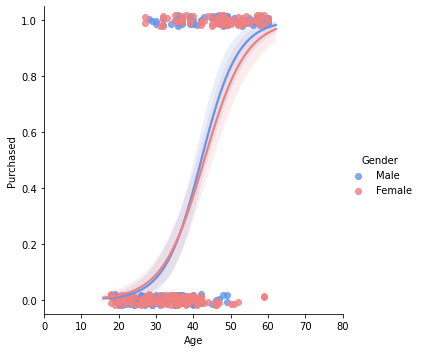

In [310]:
p = dict(Male="#6495ED", Female="#F08080")
s = sns.lmplot(x="Age", y="Purchased", hue="Gender", data=df,
               palette=p, y_jitter=.02, logistic=True, truncate=False)

s.set(xlim=(0, 80), ylim=(-.05, 1.05))
#y axis are the probabilities
#yes, clearly relationship between purchased(purchase or not purchase) and age 
#depends on gender

# Q6

In [ ]:
#Plot a: should include interaction terms because from the plot, we can see high income(positive slope) and low income(slightly negative) slopes are in different directions.

#plot b: should include the interaction term because from the plot its evident that high income 
#and low income have different slopes and they also intersect at some point.

#Plot c: shouldn't include the interaction term because from the plot its very much evident that high income 
#and low income have parallel slopes.